<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/Diabetes_W6_Kwandy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [511]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi berbasis Decision Tree.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor modul tree dari scikit-learn untuk bekerja dengan model decision tree, termasuk visualisasi Tree.
from sklearn import tree
# Mengimpor Gaussian Naive Bayes dari scikit-learn untuk membangun model klasifikasi berbasis Naive Bayes dengan distribusi Gaussian.
from sklearn.naive_bayes import GaussianNB
# Mengimpor Random Forest dari scikit-learn untuk membangun model klasifikasi berbasis Random Forest.
from sklearn.ensemble import RandomForestClassifier

In [512]:
#1
# Mengambil dataset dari URL menggunakan Pandas dan membacanya sebagai DataFrame dengan pemisah koma (',').
# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/adult.csv"
# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/breast-cancer.csv"
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/diabetes.csv"
df = pd.read_csv(url, delimiter=',')
# Menampilkan 10 sampel acak dari DataFrame untuk mendapatkan gambaran umum tentang data.
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
510,12,84,72,31,0,29.7,0.297,46,1
39,4,111,72,47,207,37.1,1.390,56,1
315,2,112,68,22,94,34.1,0.315,26,0
592,3,132,80,0,0,34.4,0.402,44,1
524,3,125,58,0,0,31.6,0.151,24,0
38,2,90,68,42,0,38.2,0.503,27,1
183,5,73,60,0,0,26.8,0.268,27,0
325,1,157,72,21,168,25.6,0.123,24,0
117,5,78,48,0,0,33.7,0.654,25,0
412,1,143,84,23,310,42.4,1.076,22,0


In [513]:
#2
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah entri,
# jumlah non-null, tipe data tiap kolom, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [514]:
#3
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame,
# termasuk jumlah, rata-rata, standar deviasi, nilai minimum, dan persentil.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [515]:
#4
# Menghitung jumlah kemunculan setiap spesies dalam kolom 'Outcome', termasuk nilai NaN (jika ada).
outcome_counts = df['Outcome'].value_counts(dropna=False)

outcome_counts

,count
Outcome,
0,500
1,268


In [516]:
# Check for any remaining missing values
df_cleaned = df.isnull().sum()

# Display the result
df_cleaned

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


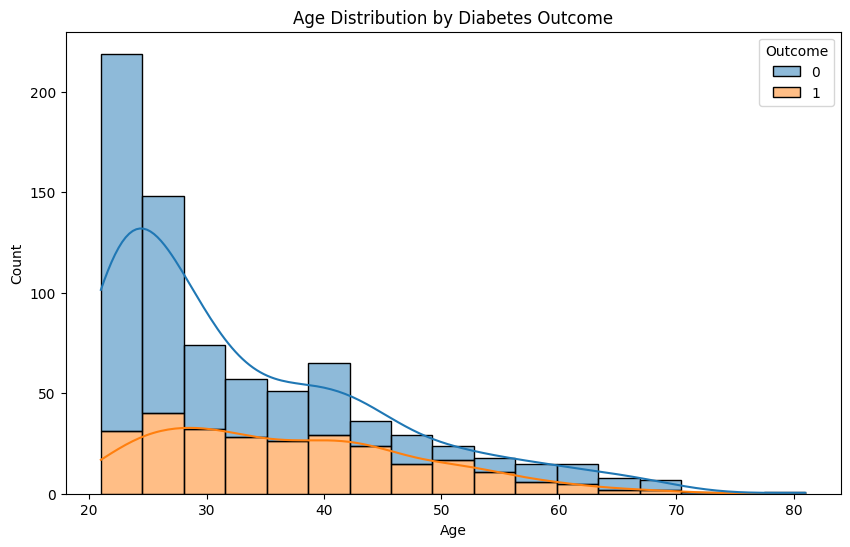

In [517]:
# Age Distribution by Outcome

# Mengatur ukuran figure menjadi 10x6 inci
plt.figure(figsize=(10, 6))

# Membuat histogram untuk distribusi usia dengan pembagian berdasarkan Outcome
# multiple='stack' mengatur histogram menjadi bertumpuk
# kde=True menambahkan garis estimasi kepadatan kernel
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', kde=True)

# Menetapkan judul plot
plt.title('Age Distribution by Diabetes Outcome')

# Menambahkan label untuk sumbu x
plt.xlabel('Age')

# Menambahkan label untuk sumbu y
plt.ylabel('Count')

# Menampilkan plot yang telah dibuat
plt.show()


# This histogram displays the age distribution of patients, separated by their
# diabetes outcome. It shows that patients diagnosed with diabetes (Outcome = 1)
# are more commonly found in the older age groups, particularly around the 40–60
# age range. In contrast, the non-diabetic group (Outcome = 0) has a more even
# distribution across age categories, with slightly younger individuals
# represented more frequently. ​

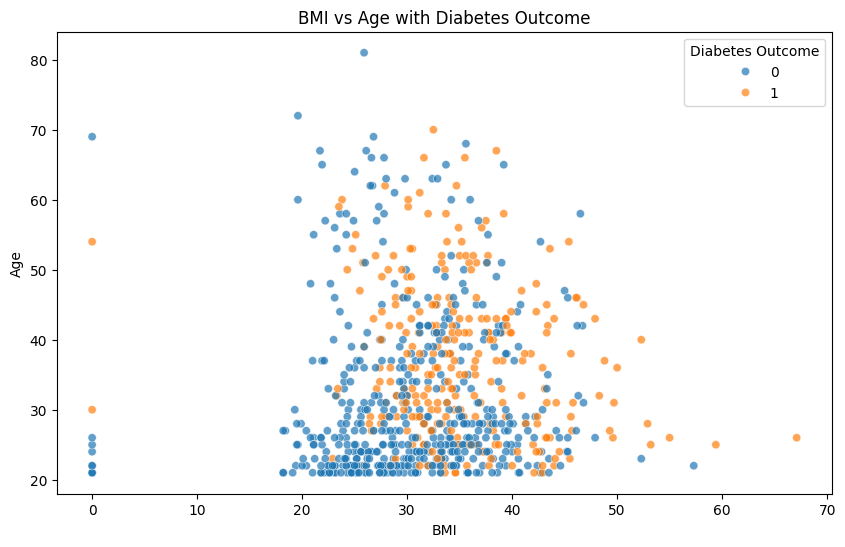

In [518]:
# BMI vs Diabetes Outcome (Scatter plot)
# Mengatur ukuran figure menjadi 10x6 inci
plt.figure(figsize=(10, 6))

# Membuat scatter plot dengan BMI di sumbu x dan Age di sumbu y
# Warna titik ditentukan oleh kolom Outcome, dan alpha mengatur transparansi
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df, alpha=0.7)

# Menetapkan judul plot
plt.title('BMI vs Age with Diabetes Outcome')

# Menambahkan label untuk sumbu x
plt.xlabel('BMI')

# Menambahkan label untuk sumbu y
plt.ylabel('Age')

# Menampilkan legenda dengan judul dan mengatur posisinya di sudut kanan atas
plt.legend(title='Diabetes Outcome', loc='upper right')

# Menampilkan plot yang telah dibuat
plt.show()


# This scatter plot visualizes the relationship between BMI, age, and diabetes
# diagnosis. It shows that higher BMI values tend to be associated with older
# patients, and those with diabetes (Outcome = 1) generally have higher BMI values
# across various age groups. This suggests that both age and BMI could be
# influential factors in the likelihood of developing diabetes. The plot also
# reveals clusters where younger patients have lower BMIs and are less likely to
# have diabetes. ​​


In [519]:
#7
# Mengambil nilai unik dari kolom Outcome untuk mengetahui yang terdapat dalam DataFrame.
unique_outcome = df['Outcome'].unique()
# Menampilkan array Outcome unique yang ditemukan dalam dataset.
print(unique_outcome)

[1 0]


In [520]:
#8
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik.
label_encoder = LabelEncoder()

# tidak perlu karena tidak ada categorical

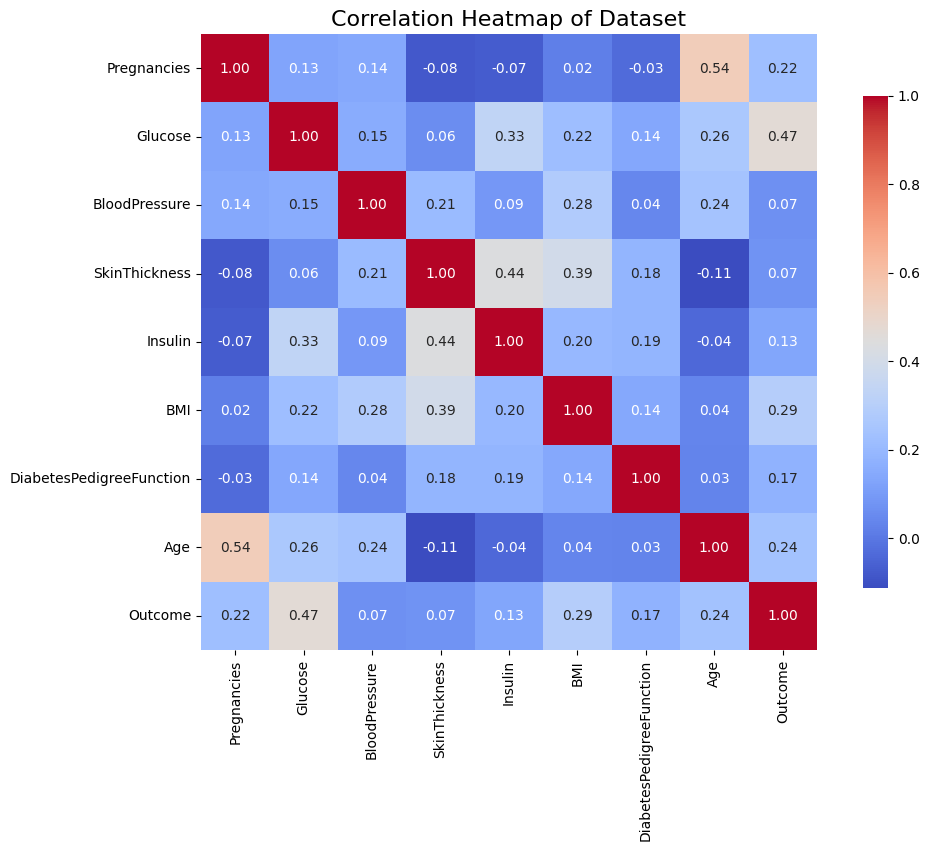

In [521]:
#10
# Menghitung matriks korelasi untuk DataFrame untuk melihat hubungan antara fitur-fitur numerik.
correlation_matrix = df.corr()

# Mengatur ukuran figure untuk visualisasi heatmap.
plt.figure(figsize=(12, 8))
# Membuat heatmap untuk matriks korelasi dengan anotasi nilai korelasi, menggunakan palet warna 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul pada heatmap.
plt.title('Correlation Heatmap of Dataset', fontsize=16)
# Menampilkan heatmap.
plt.show()

In [522]:
#1
# Menghapus kolom 'Outcome' dari DataFrame untuk membentuk fitur (X) yang akan digunakan dalam model.
X = df.drop(columns=['Outcome'])
# Menetapkan kolom 'Outcome' sebagai target variabel (y) yang akan diprediksi oleh model.
y = df['Outcome']

In [523]:
#2
# Membagi dataset menjadi set pelatihan (80%) dan set pengujian (20%) dengan menggunakan fungsi train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [524]:
#3
# Menampilkan dimensi dari set pelatihan (X_train) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_train.shape)
# Menampilkan dimensi dari set pengujian (X_test) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_test.shape)

(614, 8)
(154, 8)


Decision Tree

In [525]:
#Criterion Entropy
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'entropy', kedalaman maksimum 3, dan seed acak 0.
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [526]:
#Criterion Gini
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'gini', kedalaman maksimum 3, dan seed acak 0.
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [527]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_entropy = dt_entropy.predict(X_test)

In [528]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_gini = dt_gini.predict(X_test)

In [529]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_entropy) dengan nilai sebenarnya (y_test).
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.4f}")

Model accuracy score with criterion entropy: 0.7857


In [530]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_gini) dengan nilai sebenarnya (y_test).
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion Gini Index: {accuracy_gini:.4f}")

Model accuracy score with criterion Gini Index: 0.7922


In [531]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_entropy = dt_entropy.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_entropy = accuracy_entropy

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_entropy:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_entropy:.4f}")

Training set score: 0.8192
Test set score: 0.7857


In [532]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_gini = dt_gini.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_gini = accuracy_gini

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_gini:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_gini:.4f}")

Training set score: 0.8420
Test set score: 0.7922


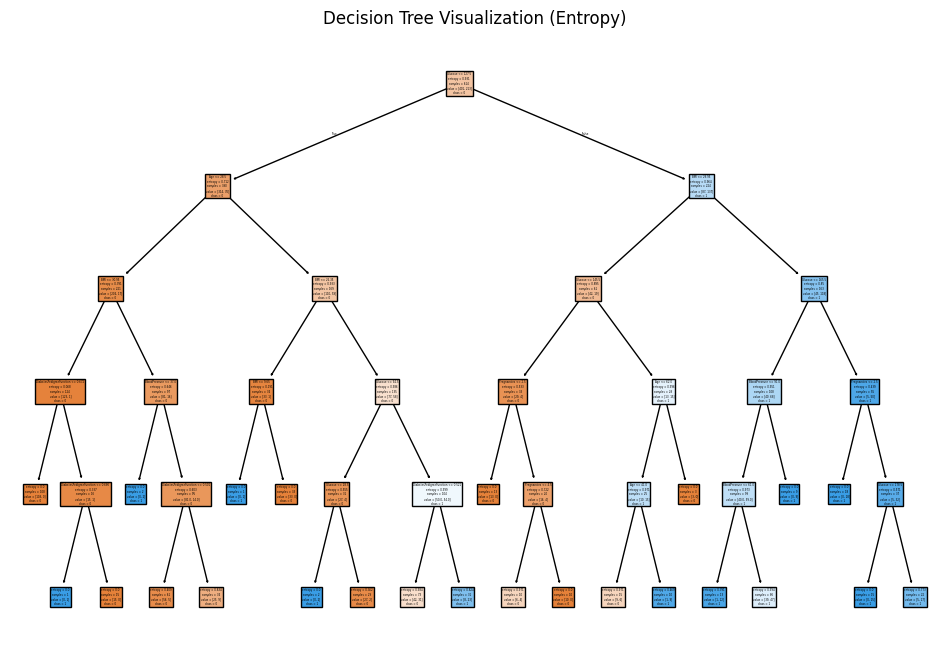

In [533]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon keputusan dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_entropy, feature_names=X.columns, class_names=['0','1'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Entropy)")
# Menampilkan visualisasi Decision Tree.
plt.show()

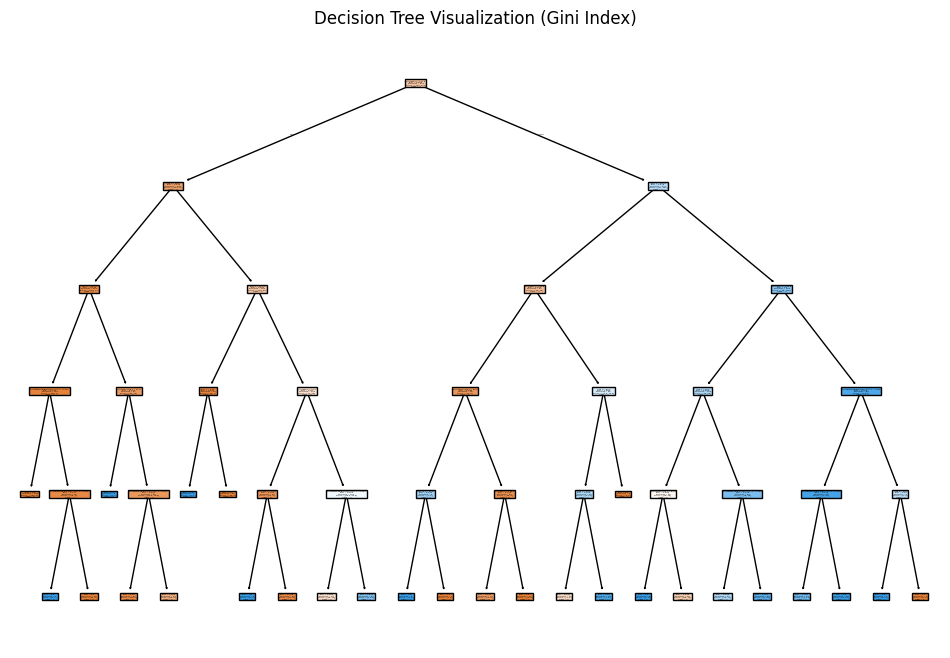

In [534]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_gini, feature_names=X.columns, class_names=['0','1'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Gini Index)")
# Menampilkan visualisasi Decision Tree.
plt.show()

In [535]:
#f
# Menghitung matriks kebingungan untuk model dengan kriteria 'entropy' dengan membandingkan nilai prediksi (y_pred_entropy) dan nilai sebenarnya (y_test).
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
# Menghitung matriks kebingungan untuk model dengan kriteria 'gini' dengan membandingkan nilai prediksi (y_pred_gini) dan nilai sebenarnya (y_test).
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

# Menampilkan matriks kebingungan untuk model dengan kriteria 'entropy'.
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)
# Menampilkan matriks kebingungan untuk model dengan kriteria 'gini'.
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[83 16]
 [17 38]]
Confusion Matrix Gini Index:
 [[87 12]
 [20 35]]


In [536]:
#g
# Menghitung laporan klasifikasi untuk model dengan kriteria 'entropy' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_entropy = classification_report(y_test, y_pred_entropy)
# Menghitung laporan klasifikasi untuk model dengan kriteria 'gini' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_gini = classification_report(y_test, y_pred_gini)

# Menampilkan laporan klasifikasi untuk model dengan kriteria 'entropy'.
print("Classification Report Entropy:\n", class_report_entropy)
# Menampilkan laporan klasifikasi untuk model dengan kriteria 'gini'.
print("Classification Report Gini Index:\n", class_report_gini)

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154

Classification Report Gini Index:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



Gaussian Naive Bayes

In [537]:
#a
# Membuat model Gaussian Naive Bayes.
nb = GaussianNB()
# Melatih model menggunakan data pelatihan (X_train dan y_train).
nb.fit(X_train, y_train)

GaussianNB()

In [538]:
#b
# Menggunakan model Gaussian Naive Bayes yang dilatih untuk memprediksi kelas target ada set pengujian (X_test).
y_pred_nb = nb.predict(X_test)

In [539]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_nb) dengan nilai sebenarnya (y_test).
test_score_nb = accuracy_score(y_test, y_pred_nb)
# Menghitung skor akurasi untuk set pelatihan menggunakan model GaussianNB.
train_score_nb = nb.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_nb:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_nb:.4f}")

#d
# Menghitung matriks kebingungan untuk model Gaussian Naive Bayes dengan membandingkan nilai prediksi (y_pred_nb) dan nilai sebenarnya (y_test).
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# Menampilkan matriks kebingungan untuk model Gaussian Naive Bayes.
print("Confusion Matrix:\n", conf_matrix_nb)

Training set score: 0.7524
Test set score: 0.7662
Confusion Matrix:
 [[79 20]
 [16 39]]


In [540]:
#e
# Menghitung laporan klasifikasi untuk model Gaussian Naive Bayes yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_nb = classification_report(y_test, y_pred_nb)
# Menampilkan laporan klasifikasi untuk model Gaussian Naive Bayes.
print("Classification Report:\n", class_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Random Forest

In [541]:
#a
# Membuat model Random Forest.
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# Melatih model menggunakan data pelatihan (X_train dan y_train).
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [542]:
#b
# Menggunakan model Random Forest yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_rf = rf.predict(X_test)

In [543]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_rf) dengan nilai sebenarnya (y_test).
test_score_rf = accuracy_score(y_test, y_pred_rf)
# Menghitung skor akurasi untuk set pelatihan menggunakan model Random Forest.
train_score_rf = rf.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_rf:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_rf:.4f}")

#d
# Menghitung matriks kebingungan untuk model Random Forest dengan membandingkan nilai prediksi (y_pred_rf) dan nilai sebenarnya (y_test).
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Menampilkan matriks kebingungan untuk model Random Forest.
print("Confusion Matrix:\n", conf_matrix_rf)

Training set score: 1.0000
Test set score: 0.7662
Confusion Matrix:
 [[81 18]
 [18 37]]


In [544]:
#e
# Menghitung laporan klasifikasi untuk model Random Forest yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_rf = classification_report(y_test, y_pred_rf)
# Menampilkan laporan klasifikasi untuk model Random Forest.
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

